# Penguin Dataset Analysis
## Assignment #2
**Course:** Data Science Fundamentals  
**MID Term Project:** ***Data Analysis & Visualization with Python of US 130 Hospitals Diabetic Dataset***  
***Submitted by:***  
Muhammzad Hamza (FA23-BSE-111)  
Muhammzad Sami (FA23-BSE-132)  
Syed Muhammad Dawood Bukhari (FA23-BSE-178)  
**Instructor:** Sir Usamn Shehzaib  
**Date:** October 20,2025

---

In [606]:
#importing libraries for datapreprocessing and visualizations 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# loading dataset from csv
df = pd.read_csv('diabetic_data.csv')

#  DATA PREPROCESSING AND VISUALIZATION

## 1 Data Preprocessing

### 1.1 Viewing first 15 recors of dataframe

In [607]:
#viewing first records of data frame
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### 1.2 Viewing shape of dataframe

In [608]:
# shape of dataframe
df.shape

(101766, 50)

### 1.3 Viewing summary statistics of dataframe

In [609]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


### 1.4 Checking for `missing values` in the dataset

In [ ]:
df.isnull().sum().sort_values(ascending=False)

max_glu_serum               96420
A1Cresult                   84748
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
encounter_id                    0
patient_nbr                     0
number_inpatient                0
number_emergency                0
diag_1                          0
diag_2                          0
number_diagnoses                0
diag_3                          0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

### 1.4 Viewing all missing Values in the Dataframe

In [611]:
print("="*80)
print("COMPREHENSIVE MISSING VALUE ANALYSIS")
print("="*80)

# Define all possible missing value indicators
missing_indicators = ['?', 'Unknown', 'Invalid', 'None', 'Not Available', '', ' ', 'NA', 'N/A']

print(f"\n📊 Dataset shape: {df.shape}")
print(f"Total cells: {df.shape[0] * df.shape[1]:,}")

# Function to count all types of missing values
def count_all_missing(series):
    """Count NaN, ?, and other missing indicators"""
    # Standard NaN
    nan_count = series.isna().sum()
    
    # String-based missing values
    string_missing = 0
    if series.dtype == 'object':
        for indicator in missing_indicators:
            string_missing += (series == indicator).sum()
    
    return nan_count + string_missing

# Calculate comprehensive missing values
missing_comprehensive = pd.DataFrame({
    'Column': df.columns,
    'Standard_NaN': [df[col].isna().sum() for col in df.columns],
    'Question_Mark': [(df[col] == '?').sum() if df[col].dtype == 'object' else 0 for col in df.columns],
    
})

missing_comprehensive['Total_Missing'] = (
    missing_comprehensive['Standard_NaN'] + 
    missing_comprehensive['Question_Mark'] 
)

missing_comprehensive['Missing_Percentage'] = (
    missing_comprehensive['Total_Missing'] / len(df) * 100
).round(2)

# Sort by total missing
missing_comprehensive = missing_comprehensive.sort_values('Total_Missing', ascending=False)

print("\n" + "="*80)
print("COMPLETE MISSING VALUE BREAKDOWN (Top 20)")
print("="*80)
print(missing_comprehensive.head(20).to_string(index=False))

# Show columns with '?' symbols
print("\n" + "="*80)
print("COLUMNS WITH '?' SYMBOLS")
print("="*80)
has_question = missing_comprehensive[missing_comprehensive['Question_Mark'] > 0]
if len(has_question) > 0:
    print(f"\n{len(has_question)} columns contain '?' symbols:")
    print(has_question[['Column', 'Question_Mark', 'Missing_Percentage']].to_string(index=False))
else:
    print("\nNo columns with '?' symbols found.")

# Show example values from columns with missing data
print("\n" + "="*80)
print("SAMPLE VALUES FROM HIGH-MISSING COLUMNS")
print("="*80)
for idx, row in missing_comprehensive.head(5).iterrows():
    col = row['Column']
    print(f"\n📌 {col} (Missing: {row['Missing_Percentage']}%)")
    print(f"   Unique values: {df[col].nunique()}")
    print(f"   Sample: {df[col].value_counts().head(5).to_dict()}")

# Summary
print("\n" + "="*80)
print("SUMMARY")
print("="*80)
total_missing = missing_comprehensive['Total_Missing'].sum()
total_cells = df.shape[0] * df.shape[1]
print(f"\nTotal missing values (all types): {total_missing:,}")
print(f"Percentage of dataset: {total_missing/total_cells*100:.2f}%")
print(f"\nColumns with >50% missing: {(missing_comprehensive['Missing_Percentage'] > 50).sum()}")
print(f"Columns with >90% missing: {(missing_comprehensive['Missing_Percentage'] > 90).sum()}")
print(f"Columns with '?' symbols: {(missing_comprehensive['Question_Mark'] > 0).sum()}")

COMPREHENSIVE MISSING VALUE ANALYSIS

📊 Dataset shape: (101766, 50)
Total cells: 5,088,300

COMPLETE MISSING VALUE BREAKDOWN (Top 20)
                  Column  Standard_NaN  Question_Mark  Total_Missing  Missing_Percentage
                  weight             0          98569          98569               96.86
           max_glu_serum         96420              0          96420               94.75
               A1Cresult         84748              0          84748               83.28
       medical_specialty             0          49949          49949               49.08
              payer_code             0          40256          40256               39.56
                    race             0           2273           2273                2.23
                  diag_3             0           1423           1423                1.40
                  diag_2             0            358            358                0.35
                  diag_1             0             21            

### 1.5 Droping highly missing values columns and non-necessary columns 

In [612]:
df.drop(["encounter_id","patient_nbr","weight","payer_code"],axis=1,inplace=True)
df.columns.tolist()

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

### 1.6 Viewing columns in the dataframe

In [613]:
# columns in the dataframe
print(df.columns.tolist())

['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


> # Hoping that medical speciality might be some strong related we will decide after Chi square test

In [614]:

# df.drop(['weight', 'payer_code', 'encounter_id', 'patient_nbr', 'medical_specialty'], axis=1, inplace=True)
# df.shape


## 2 Handling missing values

### 2.1 Handling missing values in diagnosis columns `diag 1` , `diag 2` , `diag 3`

In [615]:
# Step 1: Replace '?' with NaN (taake missing values treat ho saken)
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].replace('?', np.nan)

# Step 2: Fill missing values with mode of that column
for col in ['diag_1', 'diag_2', 'diag_3']:
    mode_value = df[col].mode()[0]   # sabse frequent value
    df[col] = df[col].fillna(mode_value)
    print(f"{col} column filled with mode: {mode_value}")

diag_1 column filled with mode: 428
diag_2 column filled with mode: 276
diag_3 column filled with mode: 250


### 2.2 imputing missing values in max_glu_serum

In [616]:
#imputing missing values in 'max_glu_serum' column with 'not_tested' 


df['max_glu_serum'] = df['max_glu_serum'].replace(np.nan, 'not_tested')
print(f" no of missing in {df[['max_glu_serum']].isnull().sum()}")


 no of missing in max_glu_serum    0
dtype: int64


In [617]:
df['max_glu_serum'].unique()

array(['not_tested', '>300', 'Norm', '>200'], dtype=object)

### 2.3 Imputing missing values in race column

In [618]:
#proportional imputation for 'race' column
# Step 1: Replace '?' with NaN for consistency
df['race'] = df['race'].replace('?', np.nan)

# Step 2: Calculate proportions (excluding NaN)
proportions = df['race'].value_counts(normalize=True)

# Step 3: Find how many values are missing
n_missing = df['race'].isna().sum()
print(f"Missing values in 'race': {n_missing}")

# Step 4: Create a random sample based on proportions
imputed_values = np.random.choice(
    proportions.index,           # unique race categories
    size=n_missing,              # number of missing values
    p=proportions.values         # their probabilities
)

# Step 5: Fill missing values with sampled values
df.loc[df['race'].isna(), 'race'] = imputed_values

# ✅ Now all missing values are filled proportionally
print("Proportional mode imputation done for 'race' column.")
print(df['race'].value_counts())

# race_counts = df['race'].value_counts(dropna=False)

# print("Unique values in 'race' column with their counts:")
# print(race_counts)


Missing values in 'race': 2273
Proportional mode imputation done for 'race' column.
race
Caucasian          77841
AfricanAmerican    19647
Hispanic            2088
Other               1536
Asian                654
Name: count, dtype: int64


### 2.4 imputing missing  in A1Cresults

In [619]:
df["A1Cresult"].fillna("not tested", inplace=True)
df["A1Cresult"].unique()

C:\Users\Muhammad Hamza\AppData\Local\Temp\ipykernel_10372\2181931278.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["A1Cresult"].fillna("not tested", inplace=True)


array(['not tested', '>7', '>8', 'Norm'], dtype=object)

### 2.5 imputing missing values in medical speciality


In [ ]:
df['medical_specialty'] = df['medical_specialty'].replace('?', 'not_known')
print(f" no of missing in {df[['medical_specialty']].isnull().sum()}")

 no of missing in medical_specialty    0
dtype: int64


In [621]:
print("="*80)
print("COMPREHENSIVE MISSING VALUE ANALYSIS")
print("="*80)

# Define all possible missing value indicators
missing_indicators = ['?', 'Unknown', 'Invalid', 'None', 'Not Available', '', ' ', 'NA', 'N/A']

print(f"\n📊 Dataset shape: {df.shape}")
print(f"Total cells: {df.shape[0] * df.shape[1]:,}")

# Function to count all types of missing values
def count_all_missing(series):
    """Count NaN, ?, and other missing indicators"""
    # Standard NaN
    nan_count = series.isna().sum()
    
    # String-based missing values
    string_missing = 0
    if series.dtype == 'object':
        for indicator in missing_indicators:
            string_missing += (series == indicator).sum()
    
    return nan_count + string_missing

# Calculate comprehensive missing values
missing_comprehensive = pd.DataFrame({
    'Column': df.columns,
    'Standard_NaN': [df[col].isna().sum() for col in df.columns],
    'Question_Mark': [(df[col] == '?').sum() if df[col].dtype == 'object' else 0 for col in df.columns],
    
})

missing_comprehensive['Total_Missing'] = (
    missing_comprehensive['Standard_NaN'] + 
    missing_comprehensive['Question_Mark'] 
)

missing_comprehensive['Missing_Percentage'] = (
    missing_comprehensive['Total_Missing'] / len(df) * 100
).round(2)

# Sort by total missing
missing_comprehensive = missing_comprehensive.sort_values('Total_Missing', ascending=False)

print("\n" + "="*80)
print("COMPLETE MISSING VALUE BREAKDOWN (Top 20)")
print("="*80)
print(missing_comprehensive.head(20).to_string(index=False))

# Show columns with '?' symbols
print("\n" + "="*80)
print("COLUMNS WITH '?' SYMBOLS")
print("="*80)
has_question = missing_comprehensive[missing_comprehensive['Question_Mark'] > 0]
if len(has_question) > 0:
    print(f"\n{len(has_question)} columns contain '?' symbols:")
    print(has_question[['Column', 'Question_Mark', 'Missing_Percentage']].to_string(index=False))
else:
    print("\nNo columns with '?' symbols found.")

# Show example values from columns with missing data
print("\n" + "="*80)
print("SAMPLE VALUES FROM HIGH-MISSING COLUMNS")
print("="*80)
for idx, row in missing_comprehensive.head(5).iterrows():
    col = row['Column']
    print(f"\n📌 {col} (Missing: {row['Missing_Percentage']}%)")
    print(f"   Unique values: {df[col].nunique()}")
    print(f"   Sample: {df[col].value_counts().head(5).to_dict()}")

# Summary
print("\n" + "="*80)
print("SUMMARY")
print("="*80)
total_missing = missing_comprehensive['Total_Missing'].sum()
total_cells = df.shape[0] * df.shape[1]
print(f"\nTotal missing values (all types): {total_missing:,}")
print(f"Percentage of dataset: {total_missing/total_cells*100:.2f}%")
print(f"\nColumns with >50% missing: {(missing_comprehensive['Missing_Percentage'] > 50).sum()}")
print(f"Columns with >90% missing: {(missing_comprehensive['Missing_Percentage'] > 90).sum()}")
print(f"Columns with '?' symbols: {(missing_comprehensive['Question_Mark'] > 0).sum()}")
print("\n" + "="*80)
print("Imputation is done")
print("="*80)

COMPREHENSIVE MISSING VALUE ANALYSIS

📊 Dataset shape: (101766, 46)
Total cells: 4,681,236



COMPLETE MISSING VALUE BREAKDOWN (Top 20)
                  Column  Standard_NaN  Question_Mark  Total_Missing  Missing_Percentage
                    race             0              0              0                 0.0
                  gender             0              0              0                 0.0
                     age             0              0              0                 0.0
       admission_type_id             0              0              0                 0.0
discharge_disposition_id             0              0              0                 0.0
     admission_source_id             0              0              0                 0.0
        time_in_hospital             0              0              0                 0.0
       medical_specialty             0              0              0                 0.0
      num_lab_procedures             0              0              0                 0.0
          num_procedures             0              0              

## 3. Handling outliers

In [622]:
cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
        'num_medications', 'number_outpatient', 
        'number_emergency', 'number_inpatient', 'number_diagnoses']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


time_in_hospital: 2252 outliers
num_lab_procedures: 143 outliers
num_procedures: 4954 outliers
num_medications: 2557 outliers
number_outpatient: 16739 outliers
number_emergency: 11383 outliers
number_inpatient: 7049 outliers
number_diagnoses: 281 outliers


In [623]:
import pandas as pd

# Example: agar tumhara DataFrame "df" hai
# df = pd.read_csv("your_dataset.csv")

numeric_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                'num_medications', 'number_outpatient', 'number_emergency',
                'number_inpatient', 'number_diagnoses']

# Dictionary to store outlier counts
outlier_summary = {}

# Loop through each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)    # 25th percentile
    Q3 = df[col].quantile(0.75)    # 75th percentile
    IQR = Q3 - Q1                  # Interquartile Range
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Detect outliers
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    
    # Store count of outliers
    outlier_summary[col] = len(outliers)

# Convert result to DataFrame for better readability
outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Column', 'Outlier_Count'])

print("\n📊 Outlier Summary (using IQR method):")
print(outlier_df)



📊 Outlier Summary (using IQR method):
               Column  Outlier_Count
0    time_in_hospital           2252
1  num_lab_procedures            143
2      num_procedures           4954
3     num_medications           2557
4   number_outpatient          16739
5    number_emergency          11383
6    number_inpatient           7049
7    number_diagnoses            281


In [624]:
import pandas as pd

# Tumhara numeric columns list
numeric_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                'num_medications', 'number_outpatient', 'number_emergency',
                'number_inpatient', 'number_diagnoses']

# Ek copy le lo taake original df safe rahe
df_cleaned = df.copy()

# Loop through har numeric column
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Filter sirf wo rows rakho jo outliers nahi hain
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_limit) & (df_cleaned[col] <= upper_limit)]

# Compare before vs after
print(f"Original rows: {len(df)}")
print(f"After outlier removal: {len(df_cleaned)}")
print(f"Rows removed: {len(df) - len(df_cleaned)}")


Original rows: 101766
After outlier removal: 66592
Rows removed: 35174


In [625]:
df['max_glu_serum'].value_counts()

max_glu_serum
not_tested    96420
Norm           2597
>200           1485
>300           1264
Name: count, dtype: int64

In [626]:
# List of all medicine-related columns
medicine_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone', 'change', 'diabetesMed'
]

# Loop through each medicine column and print unique values + their counts
for col in medicine_cols:
    print(f"\n📦 Column: {col}")
    print(df_cleaned[col].value_counts(dropna=False))

print(df_cleaned.shape)
print(df_cleaned.columns.tolist())


📦 Column: metformin
metformin
No        53064
Steady    12393
Up          748
Down        387
Name: count, dtype: int64

📦 Column: repaglinide
repaglinide
No        65671
Steady      829
Up           68
Down         24
Name: count, dtype: int64

📦 Column: nateglinide
nateglinide
No        66161
Steady      405
Up           18
Down          8
Name: count, dtype: int64

📦 Column: chlorpropamide
chlorpropamide
No        66525
Steady       62
Up            4
Down          1
Name: count, dtype: int64

📦 Column: glimepiride
glimepiride
No        63183
Steady     3063
Up          219
Down        127
Name: count, dtype: int64

📦 Column: acetohexamide
acetohexamide
No    66592
Name: count, dtype: int64

📦 Column: glipizide
glipizide
No        58325
Steady     7423
Up          509
Down        335
Name: count, dtype: int64

📦 Column: glyburide
glyburide
No        59355
Steady     6314
Up          561
Down        362
Name: count, dtype: int64

📦 Column: tolbutamide
tolbutamide
No        66574
Ste

In [627]:
# Threshold for dominance (98%)
threshold = 0.98

# Columns jaha 95%+ values 'No' hain
mostly_no_cols = []

for col in ['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
            'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
            'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide',
            'examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin',
            'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']:
    
    if (df_cleaned[col].value_counts(normalize=True).get('No', 0) > threshold):
        mostly_no_cols.append(col)

print("Columns with mostly 'No' values:")
print(mostly_no_cols)

# Drop them
df_cleaned = df_cleaned.drop(columns=mostly_no_cols)
print(f"\nDropped {len(mostly_no_cols)} columns.")
print(f"New shape: {df_cleaned.shape}")


Columns with mostly 'No' values:
['repaglinide', 'nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

Dropped 16 columns.
New shape: (66592, 30)


In [628]:
# from sklearn.preprocessing import LabelEncoder

# # Columns list (as you provided)
# cols_to_encode = [
#     'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
#     'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
#     'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
#     'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
#     'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
#     'metformin-pioglitazone', 'change', 'diabetesMed'
# ]

# # Create a copy to avoid overwriting
# df_encoded = df_cleaned.copy()

# # Initialize LabelEncoder
# le = LabelEncoder()

# # Loop through each column
# for col in cols_to_encode:
#     unique_vals = df_encoded[col].nunique()

#     # Binary encoding (for 2 unique values)
#     if unique_vals == 2:
#         df_encoded[col] = df_encoded[col].map({df_encoded[col].unique()[0]: 0,
#                                                df_encoded[col].unique()[1]: 1})
#         print(f"{col}: Binary encoded ✅")

#     # Label encoding (for more than 2 unique values)
#     else:
#         df_encoded[col] = le.fit_transform(df_encoded[col])
#         print(f"{col}: Label encoded 🔢")

# # Check encoded columns
# df_encoded[cols_to_encode].head()

df_cleaned.shape
df_cleaned.columns.tolist()


['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

In [629]:
from sklearn.preprocessing import LabelEncoder

# Only the columns that actually exist in df_cleaned
cols_to_encode = [
    'metformin', 'glimepiride', 'glipizide', 'glyburide',
    'pioglitazone', 'rosiglitazone', 'insulin',
    'change', 'diabetesMed','max_glu_serum'
]

df_encoded = df_cleaned.copy()
le = LabelEncoder()

for col in cols_to_encode:
    unique_vals = df_encoded[col].nunique()

    if unique_vals == 2:
        # Binary encoding (e.g., "No", "Steady" -> 0, 1)
        vals = df_encoded[col].unique()
        df_encoded[col] = df_encoded[col].map({vals[0]: 0, vals[1]: 1})
        print(f"{col}: Binary encoded ✅")
    else:
        # Label encoding for 3+ unique values
        df_encoded[col] = le.fit_transform(df_encoded[col])
        print(f"{col}: Label encoded 🔢")

print("\n✅ All medicine-related columns encoded successfully!")


metformin: Label encoded 🔢
glimepiride: Label encoded 🔢
glipizide: Label encoded 🔢
glyburide: Label encoded 🔢
pioglitazone: Label encoded 🔢
rosiglitazone: Label encoded 🔢
insulin: Label encoded 🔢
change: Binary encoded ✅
diabetesMed: Binary encoded ✅
max_glu_serum: Label encoded 🔢

✅ All medicine-related columns encoded successfully!


c:\Users\Muhammad Hamza\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


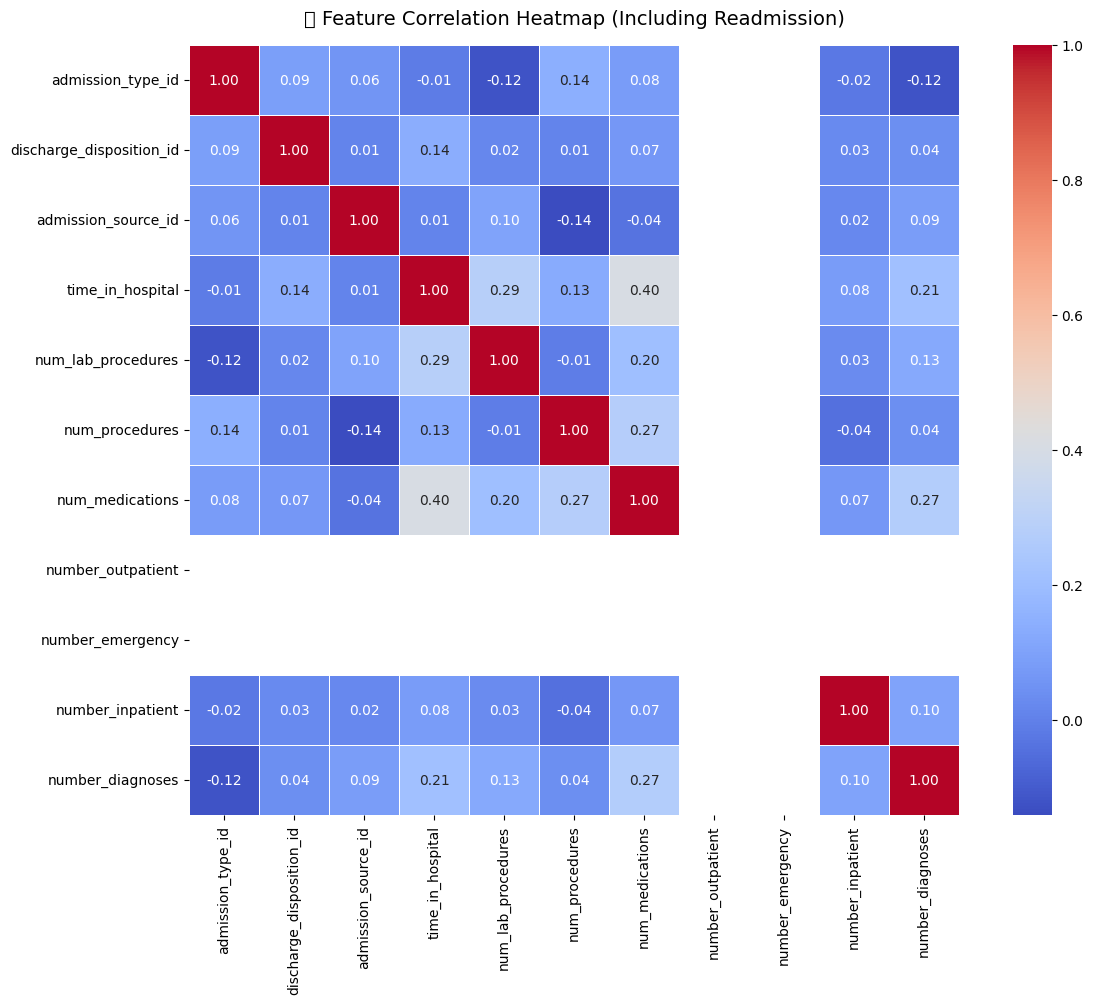

(66592, 30)


In [630]:
import matplotlib.pyplot as plt
import seaborn as sns

# If not already encoded, ensure readmitted is numeric (optional)
# df_cleaned['readmitted'] = df_cleaned['readmitted'].map({'NO': 0, '>30': 1, '<30': 2})

# Compute correlation matrix
corr = df_cleaned.corr(numeric_only=True)

# Set up the figure
plt.figure(figsize=(14, 10))

# Draw heatmap
sns.heatmap(
    corr,
    annot=True,          # Show values
    fmt=".2f",           # Format numbers
    cmap="coolwarm",     # Color palette
    linewidths=0.5,      # Line gaps
    square=True,
)

# Title
plt.title("📊 Feature Correlation Heatmap (Including Readmission)", fontsize=14, pad=15)

# Show plot
plt.show()
print(df_cleaned.shape)


<Axes: xlabel='age', ylabel='Count'>

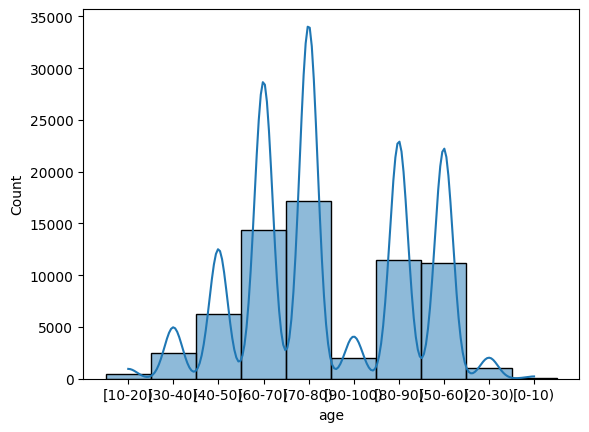

In [631]:
sns.histplot(data= df_cleaned, x = 'age', kde=True, bins=50)

<Axes: xlabel='age', ylabel='Count'>

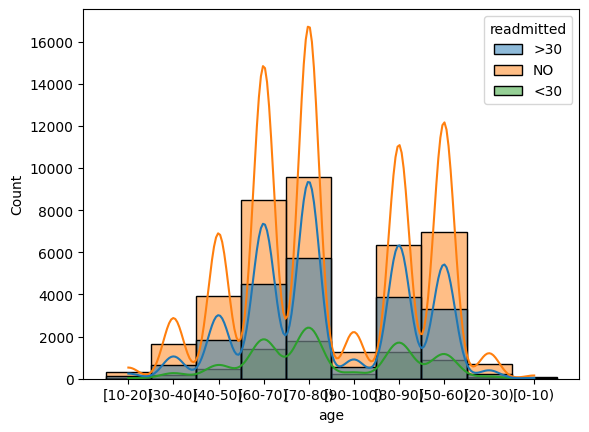

In [632]:
sns.histplot(data= df_cleaned, x = 'age', kde=True, bins=10, hue='readmitted')

<Axes: xlabel='insulin', ylabel='Count'>

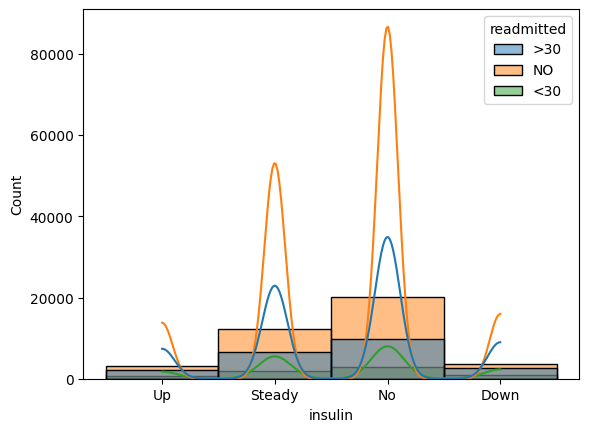

In [633]:
sns.histplot(data= df_cleaned, x = 'insulin', kde=True, bins=10, hue='readmitted')

In [634]:
from sklearn.preprocessing import LabelEncoder

# Prepare features and target
X = df_cleaned.drop('readmitted', axis=1)
y = df_cleaned['readmitted']

# Encode categorical features that haven't been encoded yet
le = LabelEncoder()

for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("🎯 Model Performance:")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

🎯 Model Performance:

Accuracy: 0.4971

📊 Confusion Matrix:
[[ 102  220  322]
 [ 218  795 1070]
 [ 339 1180 2414]]

📋 Classification Report:
              precision    recall  f1-score   support

         <30       0.15      0.16      0.16       644
         >30       0.36      0.38      0.37      2083
          NO       0.63      0.61      0.62      3933

    accuracy                           0.50      6660
   macro avg       0.38      0.38      0.38      6660
weighted avg       0.50      0.50      0.50      6660



In [635]:
from scipy.stats import chi2_contingency

# Check if A1Cresult exists in df_cleaned
if 'A1Cresult' in df_cleaned.columns:
    # Create a copy and fill missing values with 'missing' category
    df_temp = df_cleaned.copy()
    df_temp['A1Cresult'] = df_temp['A1Cresult'].fillna('missing')
    
    # Create contingency table
    contingency_table = pd.crosstab(df_temp['A1Cresult'], df_temp['readmitted'])
    
    print("📊 Contingency Table:")
    print(contingency_table)
    print("\n" + "="*60)
    
    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V (measures strength of association)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape[0], contingency_table.shape[1]) - 1
    cramers_v = np.sqrt(chi2 / (n * min_dim))
    
    print(f"\n📈 Statistical Test Results:")
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"P-value: {p_value:.6f}")
    print(f"Degrees of freedom: {dof}")
    print(f"Cramér's V: {cramers_v:.4f}")
    
    print(f"\n💡 Interpretation:")
    if p_value < 0.05:
        print("✅ There IS a statistically significant relationship (p < 0.05)")
    else:
        print("❌ There is NO statistically significant relationship (p >= 0.05)")
    
    print(f"\n🔍 Strength of Association (Cramér's V):")
    if cramers_v < 0.1:
        print("   Negligible/Weak association")
    elif cramers_v < 0.3:
        print("   Small/Moderate association")
    elif cramers_v < 0.5:
        print("   Moderate/Strong association")
    else:
        print("   Strong association")
    
    print(f"\n📝 Missing A1Cresult values: {df_cleaned['A1Cresult'].isna().sum()} out of {len(df_cleaned)} ({df_cleaned['A1Cresult'].isna().sum()/len(df_cleaned)*100:.2f}%)")
else:
    print("❌ A1Cresult column not found in df_cleaned")


📊 Contingency Table:
readmitted   <30    >30     NO
A1Cresult                     
>7           235    827   1583
>8           481   1765   3340
Norm         309    962   2188
not tested  5344  17389  32169


📈 Statistical Test Results:
Chi-square statistic: 38.2404
P-value: 0.000001
Degrees of freedom: 6
Cramér's V: 0.0169

💡 Interpretation:
✅ There IS a statistically significant relationship (p < 0.05)

🔍 Strength of Association (Cramér's V):
   Negligible/Weak association

📝 Missing A1Cresult values: 0 out of 66592 (0.00%)


In [636]:
df_cleaned.shape
df_cleaned.columns.tolist()

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

In [637]:
from scipy.stats import chi2_contingency

# List of columns to test against readmitted
columns_to_test = [
    'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
    'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 
    'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
    'A1Cresult', 'metformin', 'glimepiride', 'glipizide', 'glyburide',
    'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed','max_glu_serum'
]

# Store results
chi_square_results = []

print("📊 Chi-Square Test Results for Feature Selection")
print("=" * 80)

for col in columns_to_test:
    # Create a copy and handle missing values
    df_test = df_cleaned.copy()
    df_test[col] = df_test[col].fillna('missing')
    
    # Create contingency table
    contingency_table = pd.crosstab(df_test[col], df_test['readmitted'])
    
    # Perform chi-square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V
    n = contingency_table.sum().sum()
    min_dimension = min(contingency_table.shape[0], contingency_table.shape[1]) - 1
    cramers_v = np.sqrt(chi2_stat / (n * min_dimension))
    
    # Store results
    chi_square_results.append({
        'Feature': col,
        'Chi2_Statistic': chi2_stat,
        'P_Value': p_val,
        'Cramers_V': cramers_v,
        'Significant': 'Yes' if p_val < 0.05 else 'No'
    })
    
    print(f"\n{col}:")
    print(f"  Chi² = {chi2_stat:.4f}, p-value = {p_val:.6f}, Cramér's V = {cramers_v:.4f}")
    print(f"  Significant: {'✅ Yes' if p_val < 0.05 else '❌ No'}")

# Convert to DataFrame and sort by significance
results_df = pd.DataFrame(chi_square_results)
results_df = results_df.sort_values('P_Value')

print("\n" + "=" * 80)
print("\n📋 Summary Table (sorted by p-value):\n")
print(results_df.to_string(index=False))

# Show only significant features
significant_features = results_df[results_df['Significant'] == 'Yes']
print("\n" + "=" * 80)
print(f"\n✅ Significant Features (p < 0.05): {len(significant_features)} out of {len(columns_to_test)}")
print("\nFeatures to consider for model training:")
print(significant_features['Feature'].tolist())

📊 Chi-Square Test Results for Feature Selection

race:
  Chi² = 52.4654, p-value = 0.000000, Cramér's V = 0.0198
  Significant: ✅ Yes

gender:
  Chi² = 14.8353, p-value = 0.005055, Cramér's V = 0.0106
  Significant: ✅ Yes

age:
  Chi² = 393.6419, p-value = 0.000000, Cramér's V = 0.0544
  Significant: ✅ Yes

admission_type_id:
  Chi² = 320.8671, p-value = 0.000000, Cramér's V = 0.0491
  Significant: ✅ Yes

discharge_disposition_id:
  Chi² = 2270.2688, p-value = 0.000000, Cramér's V = 0.1306
  Significant: ✅ Yes

admission_source_id:
  Chi² = 709.8163, p-value = 0.000000, Cramér's V = 0.0730
  Significant: ✅ Yes

time_in_hospital:
  Chi² = 469.1394, p-value = 0.000000, Cramér's V = 0.0594
  Significant: ✅ Yes

num_lab_procedures:
  Chi² = 380.9548, p-value = 0.000000, Cramér's V = 0.0535
  Significant: ✅ Yes

num_procedures:
  Chi² = 134.0028, p-value = 0.000000, Cramér's V = 0.0317
  Significant: ✅ Yes

num_medications:
  Chi² = 541.6016, p-value = 0.000000, Cramér's V = 0.0638
  Signif

C:\Users\Muhammad Hamza\AppData\Local\Temp\ipykernel_10372\348178422.py:33: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2_stat / (n * min_dimension))
C:\Users\Muhammad Hamza\AppData\Local\Temp\ipykernel_10372\348178422.py:33: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2_stat / (n * min_dimension))



diag_1:
  Chi² = 3394.3458, p-value = 0.000000, Cramér's V = 0.1596
  Significant: ✅ Yes

diag_2:
  Chi² = 2664.5385, p-value = 0.000000, Cramér's V = 0.1414
  Significant: ✅ Yes

diag_3:
  Chi² = 2713.1245, p-value = 0.000000, Cramér's V = 0.1427
  Significant: ✅ Yes

number_diagnoses:
  Chi² = 831.7108, p-value = 0.000000, Cramér's V = 0.0790
  Significant: ✅ Yes

A1Cresult:
  Chi² = 38.2404, p-value = 0.000001, Cramér's V = 0.0169
  Significant: ✅ Yes

metformin:
  Chi² = 44.5142, p-value = 0.000000, Cramér's V = 0.0183
  Significant: ✅ Yes

glimepiride:
  Chi² = 11.2323, p-value = 0.081458, Cramér's V = 0.0092
  Significant: ❌ No

glipizide:
  Chi² = 58.1669, p-value = 0.000000, Cramér's V = 0.0209
  Significant: ✅ Yes

glyburide:
  Chi² = 7.3598, p-value = 0.288849, Cramér's V = 0.0074
  Significant: ❌ No

pioglitazone:
  Chi² = 19.7600, p-value = 0.003055, Cramér's V = 0.0122
  Significant: ✅ Yes

rosiglitazone:
  Chi² = 27.2997, p-value = 0.000127, Cramér's V = 0.0143
  Signifi

In [638]:
# Select only significant features for model training
# Extract significant features from the chi-square test results
significant_cols = results_df[results_df['Significant'] == 'Yes']['Feature'].tolist()

# Prepare features and target
X_significant = df_cleaned[significant_cols].copy()
y_significant = df_cleaned['readmitted']

# Handle missing values in A1Cresult
X_significant['A1Cresult'] = X_significant['A1Cresult'].fillna('missing')

# Encode all categorical features
for col in X_significant.select_dtypes(include=['object']).columns:
    X_significant[col] = le.fit_transform(X_significant[col])

# Split the data
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(
    X_significant, y_significant, test_size=0.10, random_state=42
)

# Train Decision Tree with significant features only
dt_model_sig = DecisionTreeClassifier(random_state=42)
dt_model_sig.fit(X_train_sig, y_train_sig)

# Make predictions
y_pred_sig = dt_model_sig.predict(X_test_sig)

# Evaluate the model
print("🎯 Model Performance (Significant Features Only):")
print(f"\nAccuracy: {accuracy_score(y_test_sig, y_pred_sig):.4f}")
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test_sig, y_pred_sig))
print("\n📋 Classification Report:")
print(classification_report(y_test_sig, y_pred_sig))

# Compare with previous model
print("\n" + "="*60)
print("📊 Comparison:")
print(f"Previous model (all features): {accuracy_score(y_test, y_pred):.4f}")
print(f"New model (significant features): {accuracy_score(y_test_sig, y_pred_sig):.4f}")

🎯 Model Performance (Significant Features Only):

Accuracy: 0.4782

📊 Confusion Matrix:
[[  91  228  325]
 [ 236  739 1108]
 [ 377 1201 2355]]

📋 Classification Report:
              precision    recall  f1-score   support

         <30       0.13      0.14      0.14       644
         >30       0.34      0.35      0.35      2083
          NO       0.62      0.60      0.61      3933

    accuracy                           0.48      6660
   macro avg       0.36      0.36      0.36      6660
weighted avg       0.49      0.48      0.48      6660


📊 Comparison:
Previous model (all features): 0.4971
New model (significant features): 0.4782


In [639]:
# Select only significant features for model training
significant_cols = [
    'discharge_disposition_id', 'number_inpatient', 'diag_1', 'number_diagnoses', 
    'admission_source_id', 'time_in_hospital', 'diag_2', 'num_medications', 
    'diag_3', 'age', 'diabetesMed', 'admission_type_id', 'insulin', 'change', 
    'num_procedures', 'num_lab_procedures', 'glipizide', 'race', 'metformin', 
    'A1Cresult', 'rosiglitazone', 'pioglitazone', 'gender'
]

# Prepare features and target
X_significant = df_cleaned[significant_cols].copy()
y_significant = df_cleaned['readmitted']

# Handle missing values in A1Cresult
X_significant['A1Cresult'] = X_significant['A1Cresult'].fillna('missing')

# Encode all categorical features
for col in X_significant.select_dtypes(include=['object']).columns:
    X_significant[col] = le.fit_transform(X_significant[col])

# Split the data
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(
    X_significant, y_significant, test_size=0.10, random_state=42
)

# Train Decision Tree with significant features only
dt_model_sig = DecisionTreeClassifier(random_state=42)
dt_model_sig.fit(X_train_sig, y_train_sig)

# Make predictions
y_pred_sig = dt_model_sig.predict(X_test_sig)

# Evaluate the model
print("🎯 Model Performance (Significant Features Only):")
print(f"\nAccuracy: {accuracy_score(y_test_sig, y_pred_sig):.4f}")
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test_sig, y_pred_sig))
print("\n📋 Classification Report:")
print(classification_report(y_test_sig, y_pred_sig))

# Compare with previous model
print("\n" + "="*60)
print("📊 Comparison:")
print(f"Previous model (all features): {accuracy_score(y_test, y_pred):.4f}")
print(f"New model (significant features): {accuracy_score(y_test_sig, y_pred_sig):.4f}")

🎯 Model Performance (Significant Features Only):

Accuracy: 0.4815

📊 Confusion Matrix:
[[  96  225  323]
 [ 223  746 1114]
 [ 395 1173 2365]]

📋 Classification Report:
              precision    recall  f1-score   support

         <30       0.13      0.15      0.14       644
         >30       0.35      0.36      0.35      2083
          NO       0.62      0.60      0.61      3933

    accuracy                           0.48      6660
   macro avg       0.37      0.37      0.37      6660
weighted avg       0.49      0.48      0.49      6660


📊 Comparison:
Previous model (all features): 0.4971
New model (significant features): 0.4815


### Modeling based on study conclusion

We model readmission as a binary outcome (any readmission vs none) using:

- had_a1c_test: 1 if HbA1c was ordered, 0 otherwise (captures the decision to test rather than the actual value)
- primary_dx_group: derived from diag_1 ICD-9 into diabetes vs circulatory vs other
- Controls: a small set of clinical/burden features (e.g., time_in_hospital, num_medications, number_inpatient, age, gender)

We use a Logistic Regression with one-hot encoding to keep it interpretable and report metrics and subgroup performance. We'll also run a quick ablation without had_a1c_test to show its added value.


=== Logistic Regression (with had_a1c_test) ===
Accuracy: 0.5919
F1-score: 0.4823
ROC-AUC: 0.6103

Confusion Matrix:
[[5351 2505]
 [2931 2532]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.68      0.66      7856
           1       0.50      0.46      0.48      5463

    accuracy                           0.59     13319
   macro avg       0.57      0.57      0.57     13319
weighted avg       0.59      0.59      0.59     13319


=== Subgroup performance (by primary_dx_group) ===
         group     n  accuracy        f1   roc_auc
0     diabetes  1095  0.606393  0.568569  0.640368
1  circulatory  3807  0.553980  0.528595  0.595206
2        other  8417  0.607105  0.439397  0.607641


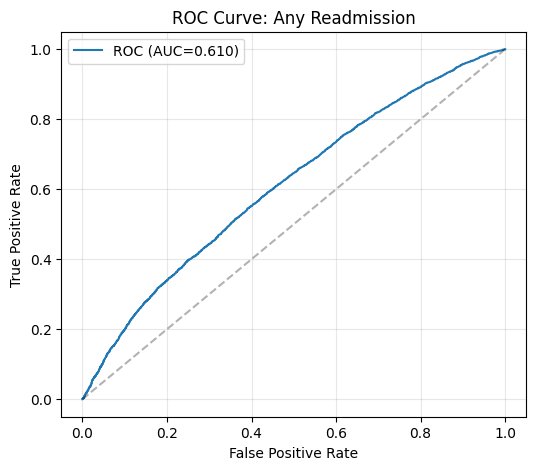


Top positive/negative coefficients:
                     feature      coef
            number_inpatient  0.558562
                 age_[80-90)  0.263763
                 age_[70-80)  0.225049
                 age_[60-70)  0.131110
   primary_dx_group_diabetes  0.032986
            time_in_hospital  0.028043
                 age_[40-50)  0.027536
             num_medications  0.013608
                 age_[50-60) -0.008227
primary_dx_group_circulatory -0.029198
               feature      coef
          age_[90-100) -0.031973
           age_[10-20) -0.044808
         gender_Female -0.053469
gender_Unknown/Invalid -0.058851
           gender_Male -0.087715
           age_[30-40) -0.111572
           age_[20-30) -0.174136
          had_a1c_test -0.200035
primary_dx_group_other -0.203824
            age_[0-10) -0.476777

Coefficient for had_a1c_test:
         feature      coef
19  had_a1c_test -0.200035

=== Ablation: without had_a1c_test ===
Accuracy: 0.5916
F1-score: 0.4820
ROC-AUC: 0.6

In [640]:
# Feature engineering and modeling per conclusion: HbA1c test decision + primary dx
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Create features reflecting the conclusion
df_model = df_cleaned.copy()

# had_a1c_test: 1 if A1Cresult is not 'None' and not missing
if 'A1Cresult' not in df_model.columns:
    raise ValueError("A1Cresult column not found in df_cleaned")
df_model['A1Cresult'] = df_model['A1Cresult'].fillna('None')
df_model['had_a1c_test'] = (~df_model['A1Cresult'].isin(['None'])).astype(int)

# primary_dx_group from diag_1 ICD-9
def map_primary_dx(diag):
    # diag can be strings like '250.13', '410', 'V45', '?'
    try:
        code = float(diag)
    except Exception:
        return 'other'
    # Diabetes 250.xx
    if 250 <= code < 251:
        return 'diabetes'
    # Circulatory: 390-459, 785 per UCI dataset notes
    if (390 <= code <= 459) or (code == 785):
        return 'circulatory'
    return 'other'

if 'diag_1' not in df_model.columns:
    raise ValueError("diag_1 column not found in df_cleaned")
df_model['primary_dx_group'] = df_model['diag_1'].apply(map_primary_dx)

# 2) Define target: any readmission ("NO" -> 0, ">30" or "<30" -> 1)
if 'readmitted' not in df_model.columns:
    raise ValueError("readmitted column not found in df_cleaned")
y = (df_model['readmitted'] != 'NO').astype(int)

# 3) Select features
numeric_features = [
    'time_in_hospital', 'num_medications', 'number_inpatient'
]
categorical_features = [
    'age', 'gender', 'primary_dx_group'
    # Note: admission_type_id/source/discharge IDs could also be added as categorical if desired
]

# Keep only available columns (robustness)
numeric_features = [c for c in numeric_features if c in df_model.columns]
categorical_features = [c for c in categorical_features if c in df_model.columns]

feature_cols = numeric_features + categorical_features + ['had_a1c_test']
X = df_model[feature_cols].copy()

# 4) Preprocess + model
preprocess = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
], remainder='passthrough')

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=None)

clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', log_reg)
])

# 5) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6) Fit and evaluate
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
try:
    roc = roc_auc_score(y_test, y_proba)
except Exception:
    roc = np.nan

print("\n=== Logistic Regression (with had_a1c_test) ===")
print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7) Subgroup evaluation by primary_dx_group
def subgroup_metrics(group_name, mask):
    if mask.sum() == 0:
        return {"group": group_name, "n": 0, "accuracy": np.nan, "f1": np.nan, "roc_auc": np.nan}
    acc_g = accuracy_score(y_test[mask], y_pred[mask])
    f1_g = f1_score(y_test[mask], y_pred[mask])
    try:
        roc_g = roc_auc_score(y_test[mask], y_proba[mask])
    except Exception:
        roc_g = np.nan
    return {"group": group_name, "n": int(mask.sum()), "accuracy": acc_g, "f1": f1_g, "roc_auc": roc_g}

print("\n=== Subgroup performance (by primary_dx_group) ===")
subgroups = {}
if 'primary_dx_group' in X_test.columns:
    # If original categorical present, we can use it directly from X_test
    dx = X_test['primary_dx_group']
else:
    # If not, recompute from df_model indices
    dx = df_model.loc[X_test.index, 'primary_dx_group']

results = []
for g in ['diabetes', 'circulatory', 'other']:
    m = (dx == g).values
    results.append(subgroup_metrics(g, m))

print(pd.DataFrame(results))

# 8) ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC (AUC={auc(fpr,tpr):.3f})')
plt.plot([0,1],[0,1],'k--', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Any Readmission')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 9) Coefficient for had_a1c_test (interpretability)
# Extract feature names after preprocessing
ohe = clf.named_steps['preprocess'].named_transformers_['onehot']
ohe_features = list(ohe.get_feature_names_out(categorical_features))
final_feature_names = ohe_features + numeric_features + ['had_a1c_test']
coefs = clf.named_steps['model'].coef_.ravel()
coef_df = pd.DataFrame({'feature': final_feature_names, 'coef': coefs}).sort_values('coef', ascending=False)
print("\nTop positive/negative coefficients:")
print(coef_df.head(10).to_string(index=False))
print(coef_df.tail(10).to_string(index=False))
print("\nCoefficient for had_a1c_test:")
print(coef_df[coef_df['feature'] == 'had_a1c_test'])

# 10) Ablation: remove had_a1c_test and compare
X2 = df_model[[c for c in feature_cols if c != 'had_a1c_test']].copy()
preprocess2 = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), [c for c in categorical_features if c in X2.columns])
], remainder='passthrough')
clf2 = Pipeline([('preprocess', preprocess2), ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))])
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42, stratify=y)
clf2.fit(X2_train, y2_train)
y2_pred = clf2.predict(X2_test)
y2_proba = clf2.predict_proba(X2_test)[:,1]
acc2 = accuracy_score(y2_test, y2_pred)
f12 = f1_score(y2_test, y2_pred)
try:
    roc2 = roc_auc_score(y2_test, y2_proba)
except Exception:
    roc2 = np.nan
print("\n=== Ablation: without had_a1c_test ===")
print(f"Accuracy: {acc2:.4f}")
print(f"F1-score: {f12:.4f}")
print(f"ROC-AUC: {roc2:.4f}")
print("\nDelta (with - without):")
print(f"Accuracy: {acc-acc2:+.4f}")
print(f"F1-score: {f1-f12:+.4f}")
print(f"ROC-AUC: {roc-roc2:+.4f}")

### Decision Tree visualization (HbA1c decision + primary diagnosis)
We train a compact Decision Tree on the engineered features (had_a1c_test, primary_dx_group, and a few controls) and visualize the tree to interpret decision paths.


=== Decision Tree (interpretable) ===
Accuracy: 0.5775
F1-score: 0.5160
ROC-AUC: 0.6065

Confusion Matrix:
 [[4692 3164]
 [2463 3000]]


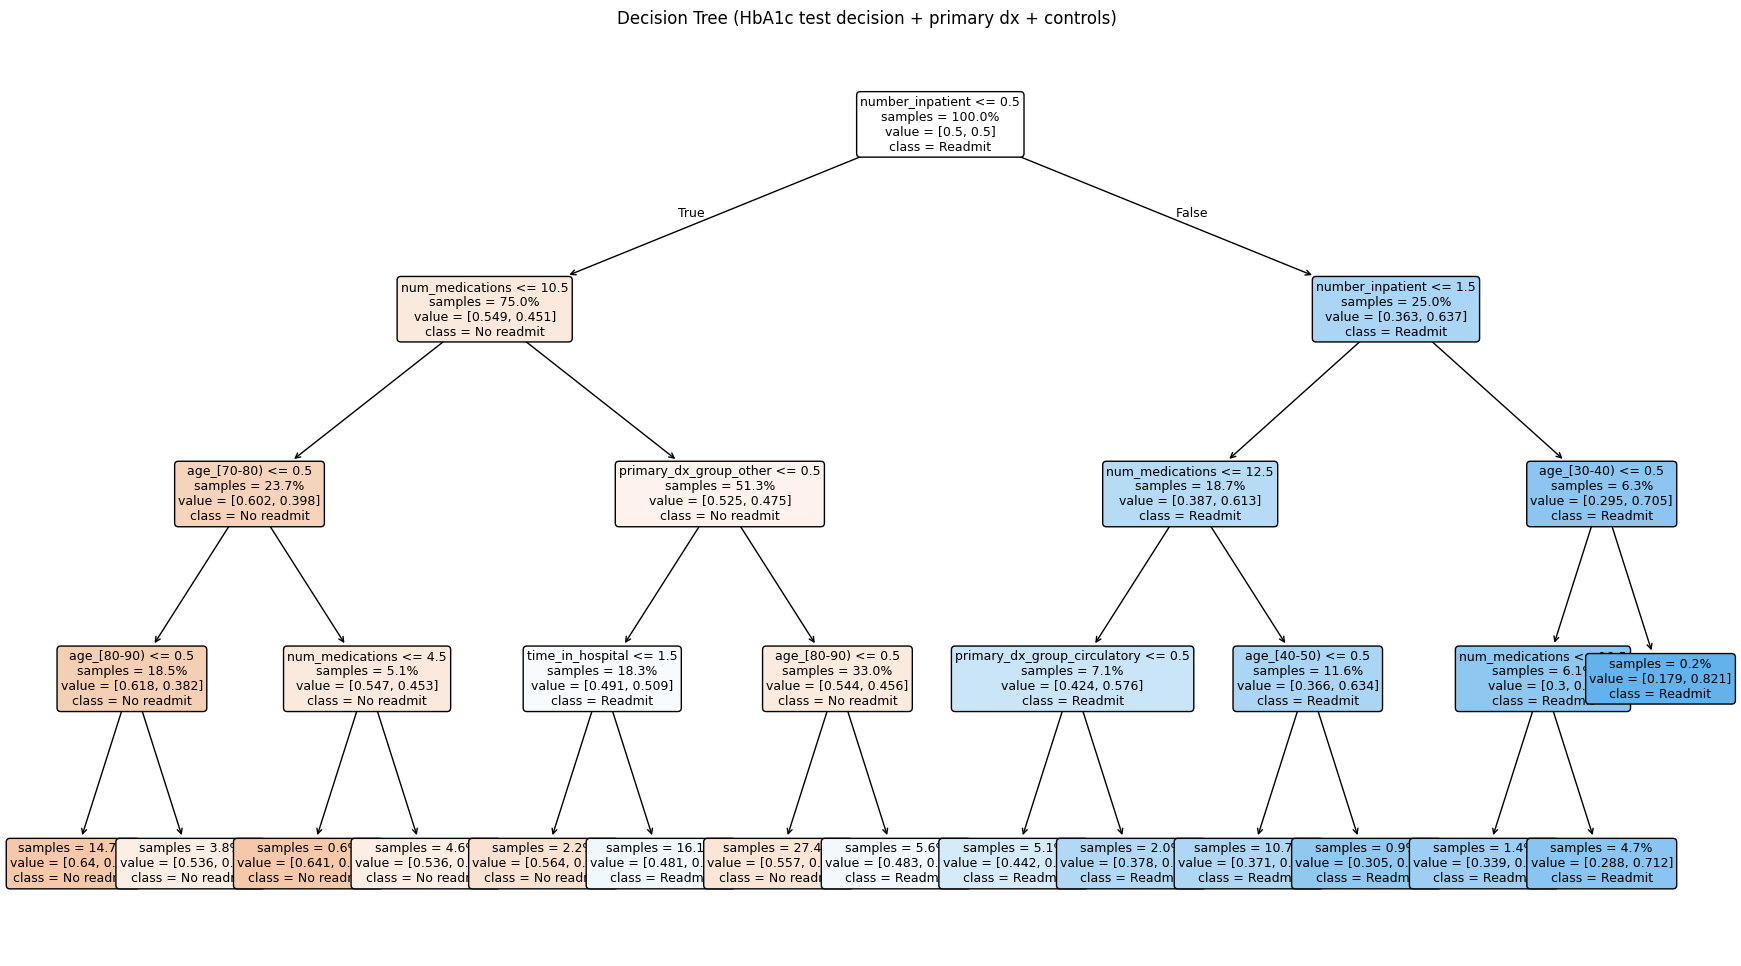

C:\Users\Muhammad Hamza\AppData\Local\Temp\ipykernel_10372\3522127022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df, x='importance', y='feature', palette='viridis')


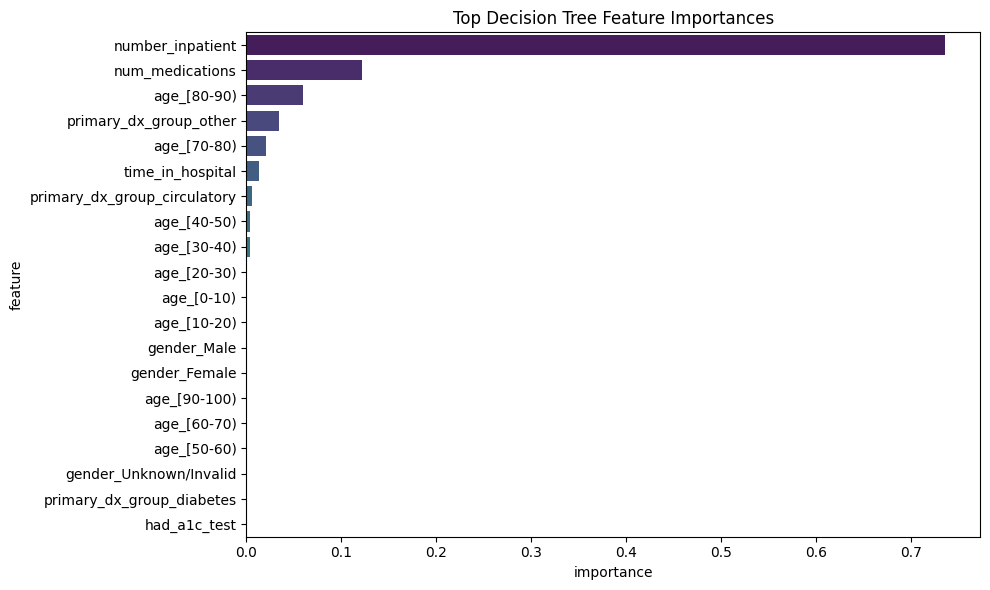

In [641]:
# Train and visualize a compact Decision Tree on engineered features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

# Recreate engineered features (same as the previous modeling cell)
df_model_dt = df_cleaned.copy()
df_model_dt['A1Cresult'] = df_model_dt['A1Cresult'].fillna('None')
df_model_dt['had_a1c_test'] = (~df_model_dt['A1Cresult'].isin(['None'])).astype(int)

def map_primary_dx(diag):
    try:
        code = float(diag)
    except Exception:
        return 'other'
    if 250 <= code < 251:
        return 'diabetes'
    if (390 <= code <= 459) or (code == 785):
        return 'circulatory'
    return 'other'

df_model_dt['primary_dx_group'] = df_model_dt['diag_1'].apply(map_primary_dx)
y_dt = (df_model_dt['readmitted'] != 'NO').astype(int)

numeric_features_dt = [c for c in ['time_in_hospital','num_medications','number_inpatient'] if c in df_model_dt.columns]
categorical_features_dt = [c for c in ['age','gender','primary_dx_group'] if c in df_model_dt.columns]
feature_cols_dt = numeric_features_dt + categorical_features_dt + ['had_a1c_test']
X_dt = df_model_dt[feature_cols_dt].copy()

# Preprocess and model
pre_dt = ColumnTransformer([('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features_dt)], remainder='passthrough')
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=100, class_weight='balanced', random_state=42)
dt_pipe = Pipeline([('preprocess', pre_dt), ('model', dt)])

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42, stratify=y_dt)
dt_pipe.fit(X_train_dt, y_train_dt)
y_pred_dt = dt_pipe.predict(X_test_dt)
y_proba_dt = dt_pipe.predict_proba(X_test_dt)[:,1]

print("\n=== Decision Tree (interpretable) ===")
print(f"Accuracy: {accuracy_score(y_test_dt, y_pred_dt):.4f}")
print(f"F1-score: {f1_score(y_test_dt, y_pred_dt):.4f}")
try:
    print(f"ROC-AUC: {roc_auc_score(y_test_dt, y_proba_dt):.4f}")
except Exception:
    pass
print("\nConfusion Matrix:\n", confusion_matrix(y_test_dt, y_pred_dt))

# Build feature names for plotting
ohe_dt = dt_pipe.named_steps['preprocess'].named_transformers_['onehot']
ohe_names_dt = list(ohe_dt.get_feature_names_out(categorical_features_dt))
final_names_dt = ohe_names_dt + numeric_features_dt + ['had_a1c_test']

# Visualize the tree
plt.figure(figsize=(22, 12))
plot_tree(dt_pipe.named_steps['model'],
          feature_names=final_names_dt,
          class_names=['No readmit','Readmit'],
          filled=True,
          rounded=True,
          proportion=True,
          impurity=False,
          fontsize=9)
plt.title('Decision Tree (HbA1c test decision + primary dx + controls)')
plt.show()

# Optional: Feature importance bar plot
importances = dt_pipe.named_steps['model'].feature_importances_
imp_df = pd.DataFrame({'feature': final_names_dt, 'importance': importances}).sort_values('importance', ascending=False).head(20)
plt.figure(figsize=(10,6))
sns.barplot(data=imp_df, x='importance', y='feature', palette='viridis')
plt.title('Top Decision Tree Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:

df_cleaned["max_glu_serum"].unique()

array(['not_tested', '>300', 'Norm', '>200'], dtype=object)